Daten Augmentation
 ------
 
 Einleitung
 ------
 
Dieses Notebook ist dafür da, um die Bibliothek Keras ImageDataGenerator auszuprobieren.   
Durch die Klasse ImageDataGenerator können zusätzliche Bilder erzeugt werden. Damit kann für ein neuronales Netz  
die Anzahl der verfügbaren Trainingsdaten erweitert werden. Dies reduziert Overfittung (Überanpassung) eines Netzes   
und steigert die Generalisierung bei der Klassifizierung von unbekannten Bildern. Die Bilder können erzeugt  
werden durch Transformation der vorhandenen Bilder. Zu den Transformationen    
gehören z.B. Rotation, Skalierung der Pixelwerte und zoomen.

Versuchsaufbau
------
 
Für den Datensatz 22 werden mit Daten Argumentation weitere Bilder erzeugt. Dabei ist interessant welche art von Transformationen für die Bilder sinnvoll sind. Im nächsten Schritt soll ein Stapel von Bildern augmentiert werden.
 
 Ergebnis 
 ------
 
 Fazit
 ------

In [34]:
# Lade Bibliothek Keras ImageDataGenerator und weitere
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import matplotlib.pyplot as plt

Klasse ImageDataGenerator   
Argumente:   
* fill_mode, Bei einer zufälligen Transformation können für eine Eingangswerte außerhalb des Bildbereich des Bildes sein. Hier wird angegeben wie Farbwerte aufgefüllt werden. Möglich sind die Operationen 'nearest', 'constant', 'reflect' und 'wrap'     
* rotation_range, Wertebereich zufälliger Rotierungen in Grad
* width_shift_range, height_shift_range, Wertebereich für zufällige Anpassung der Vertikalen oder Horizontalen Position  
* shear_range, zufällige geometrische Scherung 
* zoom_range, zufälliger Zoom Wertebereich
* horizontal_flip, Bild wird zufällig horizontal gespiegelt
* viele weitere siehe https://keras.io/preprocessing/image/  

In [44]:
datagen = ImageDataGenerator(
        shear_range=160,
        fill_mode='nearest')

In [28]:
# Daten Argumenation aus einem Bild
img = cv2.imread('../../daten/datensatz/22/zugeschnitten/1/1523020590363.jpg')
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) #shape (1, 3, h, w)
print(x.shape)

(1, 362, 70, 3)


Text(0.5,1,'Eingangsbild')

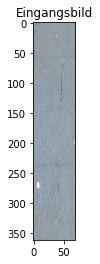

In [38]:
# Bild ausgeben 
plt.imshow(img)
plt.title('Eingangsbild')

Die Methode flow() generiert einen Stapel von Bildern, welche abgespeichert werden.  
Argumente:
* x, Bilder im Numpy Format (Rang 4 mit Angabe der Farbkanäle)   
* batch_size, TODO   
* save_to_dir, Pfad in dem die Bilder geschrieben werden  
* save_format, Bildformat beim abspeichern

In [46]:
i = 0 
samples = 4 # Anzahl der Bilder
for batch in datagen.flow(x, batch_size=1, save_to_dir='beispielDataAugmentation_shearRange160', save_format='jpg'):
    i += 1
    if i >= samples: 
        break